In [130]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect('../zippedData/im.db')

## Connect to im.db database and join movie_basics, directors, persons and movie_ratings tables

In [3]:
query = """
SELECT DISTINCT mb.primary_title AS "Movie Name", mb.start_year AS "Release Year", mb.genres AS "Genres", p.primary_name AS "Director", mr.averagerating AS "Avg Rating", mr.numvotes AS "Number of Votes"

FROM movie_basics mb
    
    LEFT JOIN directors d
        ON mb.movie_id = d.movie_id
    LEFT JOIN persons p
        ON d.person_id = p.person_id
    LEFT JOIN movie_ratings mr
        ON mb.movie_id = mr.movie_id

WHERE mr.numvotes > 500

ORDER BY mr.averagerating DESC

"""
imdb_df = pd.read_sql_query(query, conn)
len(imdb_df)

15595

In [4]:
imdb_df.head()

,Movie Name,Release Year,Genres,Director,Avg Rating,Number of Votes
0,Once Upon a Time ... in Hollywood,2019,"Comedy,Drama",Quentin Tarantino,9.7,5600
1,Eghantham,2018,Drama,Arsel Arumugam,9.7,639
2,Yeh Suhaagraat Impossible,2019,Comedy,Abhinav Thakur,9.6,624
3,Ananthu V/S Nusrath,2018,"Comedy,Drama,Family",Sudheer Shanbhogue,9.6,808
4,Ekvtime: Man of God,2018,"Biography,Drama,History",Nikoloz Khomasuridze,9.6,2604


## Read in csv file derived from tn_movie database

**The following csv file was created in a separate Jupyter Notebook called "Exploration_tn_movie_budgets". It has an added column containing just the release year as opposed to the full date.**

In [5]:
tn_df = pd.read_csv('../zippedData/NzModified_tn.movie_budgets.csv')

In [6]:
len(tn_df)

5782

In [7]:
tn_movie_list = tn_df['movie']

In [8]:
tn_df['movie'][0]

'Avatar'

In [9]:
imdb_df.keys()

Index(['Movie Name', 'Release Year', 'Genres', 'Director', 'Avg Rating',
       'Number of Votes'],
      dtype='object')

In [10]:
imdb_df['Movie Name']

0                        Once Upon a Time ... in Hollywood
1                                                Eghantham
2                                Yeh Suhaagraat Impossible
3                                      Ananthu V/S Nusrath
4                                      Ekvtime: Man of God
                               ...                        
15590                         Browncoats: Independence War
15591    Kanagawa University of Fine Arts, Office of Fi...
15592                                             Yurameku
15593                                               Badang
15594                                        My First Love
Name: Movie Name, Length: 15595, dtype: object

In [11]:
imdb_df.loc[imdb_df['Movie Name'] == 'Yeh Suhaagraat Impossible']

,Movie Name,Release Year,Genres,Director,Avg Rating,Number of Votes
2,Yeh Suhaagraat Impossible,2019,Comedy,Abhinav Thakur,9.6,624


In [12]:
imdb_df.loc[imdb_df['Movie Name'] == tn_df['movie'][3]]

,Movie Name,Release Year,Genres,Director,Avg Rating,Number of Votes
2644,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",Joss Whedon,7.3,665594


In [13]:
tn_df.loc[tn_df['movie'] == 'Avatar']

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009


## Merge imdb and tn dataframes with inner join on movie names

In [14]:
merged_df = imdb_df.merge(tn_df, left_on="Movie Name", right_on="movie", how='inner')

In [15]:
merged_df.head()

,Movie Name,Release Year,Genres,Director,Avg Rating,Number of Votes,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,Frankenstein,2011,Drama,Danny Boyle,9.0,1832,1302,3,"Nov 4, 1994",Frankenstein,"$45,000,000","$22,006,296","$112,006,296",1994
1,Frankenstein,2015,"Horror,Sci-Fi,Thriller",Bernard Rose,5.1,2089,1302,3,"Nov 4, 1994",Frankenstein,"$45,000,000","$22,006,296","$112,006,296",1994
2,Inception,2010,"Action,Adventure,Sci-Fi",Christopher Nolan,8.8,1841066,137,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642",2010
3,Coriolanus,2014,"Drama,History,War",Tim Van Someren,8.7,1347,3698,99,"Jan 20, 2012",Coriolanus,"$10,000,000","$749,641","$2,179,623",2012
4,Coriolanus,2011,"Drama,Thriller,War",Ralph Fiennes,6.1,29654,3698,99,"Jan 20, 2012",Coriolanus,"$10,000,000","$749,641","$2,179,623",2012


In [70]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2111
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie Name         2112 non-null   object 
 1   Release Year       2112 non-null   int64  
 2   Genres             2112 non-null   object 
 3   Director           2112 non-null   object 
 4   Avg Rating         2112 non-null   float64
 5   Number of Votes    2112 non-null   int64  
 6   Unnamed: 0         2112 non-null   int64  
 7   id                 2112 non-null   int64  
 8   release_date       2112 non-null   object 
 9   movie              2112 non-null   object 
 10  production_budget  2112 non-null   object 
 11  domestic_gross     2112 non-null   object 
 12  worldwide_gross    2112 non-null   object 
 13  year               2112 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 247.5+ KB


**This is a significantly reduced data set compared to the imdb database but still has sufficient number of records to derive trends.**

In [25]:
merged_df.sort_values(by=['domestic_gross'], ascending=False)

,Movie Name,Release Year,Genres,Director,Avg Rating,Number of Votes,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
385,Christopher Robin,2018,"Adventure,Animation,Comedy",Marc Forster,7.3,52737,642,43,"Aug 3, 2018",Christopher Robin,"$75,000,000","$99,215,042","$197,504,758",2018
1401,Hercules,2014,"Action,Adventure,Fantasy",Brett Ratner,6.0,137287,707,8,"Jun 13, 1997",Hercules,"$70,000,000","$99,112,101","$250,700,000",1997
1022,Olympus Has Fallen,2013,"Action,Thriller",Antoine Fuqua,6.5,235443,708,9,"Mar 22, 2013",Olympus Has Fallen,"$70,000,000","$98,927,592","$172,878,928",2013
1521,The Green Hornet,2011,"Action,Comedy,Crime",Michel Gondry,5.8,148622,328,29,"Jan 14, 2011",The Green Hornet,"$110,000,000","$98,780,042","$229,155,503",2011
1179,Date Night,2010,"Comedy,Crime,Romance",Shawn Levy,6.3,144683,998,99,"Apr 9, 2010",Date Night,"$55,000,000","$98,711,404","$152,269,033",2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,The Veil,2016,Horror,Phil Joanou,4.8,6895,4563,64,"Dec 31, 2015",The Veil,"$4,000,000",$0,$0,2015
1933,The Veil,2017,"Action,Adventure,Sci-Fi",Brent Ryan Green,3.5,1236,4563,64,"Dec 31, 2015",The Veil,"$4,000,000",$0,$0,2015
1691,Survivor,2015,"Action,Crime,Thriller",James McTeigue,5.6,28614,2710,11,"May 29, 2015",Survivor,"$20,000,000",$0,"$1,703,281",2015
1935,Dawn Patrol,2014,"Drama,Thriller",Daniel Petrie Jr.,4.8,615,4631,32,"Jun 5, 2015",Dawn Patrol,"$3,500,000",$0,$0,2015


In [73]:
# sorted_df = merged_df.sort_values(by=['Director','domestic_gross'], ascending=False)
# sorted_df.head()

In [74]:
# directors = list(set(sorted_df['Director']))
# type(directors)

In [75]:
director = "Quentin Tarantino"
merged_df.loc[merged_df['Director'] == director]

,Movie Name,Release Year,Genres,Director,Avg Rating,Number of Votes,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
19,Django Unchained,2012,"Drama,Western",Quentin Tarantino,8.4,1211405,368,69,"Dec 25, 2012",Django Unchained,"$100,000,000","$162,805,434","$449,948,323",2012
130,The Hateful Eight,2015,"Crime,Drama,Mystery",Quentin Tarantino,7.8,434966,832,33,"Dec 25, 2015",The Hateful Eight,"$62,000,000","$54,117,416","$147,864,886",2015


In [103]:
# del merged_df['float_worldwide_gross']

In [105]:
merged_df['float_production_budget'] = merged_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
merged_df['float_domestic_gross'] = merged_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
merged_df['float_worldwide_gross'] = merged_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [111]:
merged_df['profit percent'] = (merged_df['float_domestic_gross'] + merged_df['float_worldwide_gross']) / merged_df['float_production_budget'] * 100

In [112]:
merged_df.head()

,Movie Name,Release Year,Genres,Director,Avg Rating,Number of Votes,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,float_production_budget,float_domestic_gross,float_worldwide_gross,profit percent
0,Frankenstein,2011,Drama,Danny Boyle,9.0,1832,1302,3,"Nov 4, 1994",Frankenstein,"$45,000,000","$22,006,296","$112,006,296",1994,45000000.0,22006296.0,112006296.0,297.805760
1,Frankenstein,2015,"Horror,Sci-Fi,Thriller",Bernard Rose,5.1,2089,1302,3,"Nov 4, 1994",Frankenstein,"$45,000,000","$22,006,296","$112,006,296",1994,45000000.0,22006296.0,112006296.0,297.805760
2,Inception,2010,"Action,Adventure,Sci-Fi",Christopher Nolan,8.8,1841066,137,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642",2010,160000000.0,292576195.0,835524642.0,705.063023
3,Coriolanus,2014,"Drama,History,War",Tim Van Someren,8.7,1347,3698,99,"Jan 20, 2012",Coriolanus,"$10,000,000","$749,641","$2,179,623",2012,10000000.0,749641.0,2179623.0,29.292640
4,Coriolanus,2011,"Drama,Thriller,War",Ralph Fiennes,6.1,29654,3698,99,"Jan 20, 2012",Coriolanus,"$10,000,000","$749,641","$2,179,623",2012,10000000.0,749641.0,2179623.0,29.292640


In [261]:
merged_df.groupby(by='Director')[['Avg Rating', 'float_production_budget', 'float_domestic_gross', 'float_worldwide_gross', 'profit percent']].agg(['mean', 'count'])

Avg Rating       float_production_budget        \
                       mean count                    mean count   
Director                                                          
Aaron Hann              6.0     1               2000000.0     1   
Aaron Seltzer           3.4     1              20000000.0     1   
Aaron T. Wells          3.5     1                500000.0     1   
Abby Kohn               5.4     1              32000000.0     1   
Abdolreza Kahani        7.0     1               4000000.0     1   
...                     ...   ...                     ...   ...   
Zackary Adler           5.0     1               2500000.0     1   
Zak Forsman             5.2     1                 50000.0     1   
Zal Batmanglij          6.7     2               3317500.0     2   
Zhigang Yang            7.1     1              70000000.0     1   
Zsófia Szilágyi         7.2     1              15000000.0     1   

                 float_domestic_gross       float_worldwide_gross        \
                                 mean count                  mean count   
Director                                                                  
Aaron Hann                    10024.0     1               10024.0     1   
Aaron Seltzer              36661504.0     1            81424988.0     1   
Aaron T. Wells                    0.0     1                   0.0     1   
Abby Kohn                  48795601.0     1            91553797.0     1   
Abdolreza Kahani                  0.0     1               63180.0     1   
...                               ...   ...                   ...   ...   
Zackary Adler                     0.0     1                   0.0     1   
Zak Forsman                       0.0     1                   0.0     1   
Zal Batmanglij              1341332.0     2             1728702.0     2   
Zhigang Yang               55011732.0     1            94973540.0     1   
Zsófia Szilágyi            13843771.0     1            59168692.0     1   

                 profit percent        
                           mean count  
Director                               
Aaron Hann             1.002400     1  
Aaron Seltzer        590.432460     1  
Aaron T. Wells         0.000000     1  
Abby Kohn            438.591869     1  
Abdolreza Kahani       1.579500     1  
...                         ...   ...  
Zackary Adler          0.000000     1  
Zak Forsman            0.000000     1  
Zal Batmanglij       350.960751     2  
Zhigang Yang         214.264674     1  
Zsófia Szilágyi      486.749753     1  

[1426 rows x 10 columns]

In [262]:
# director_df = merged_df.groupby(by='Director')[['Director','Avg Rating', 'Number of Votes', 'float_production_budget', 'profit percent']].agg(['mean', 'count'])

director_count = merged_df.groupby(by='Director')['Director'].count()
director_means = merged_df.groupby(by='Director')[['Avg Rating', 'Number of Votes', 'float_production_budget', 'float_domestic_gross', 'float_worldwide_gross', 'profit percent']].mean()

director_means['count'] = director_count
director_means

,Avg Rating,Number of Votes,float_production_budget,float_domestic_gross,float_worldwide_gross,profit percent,count
Director,,,,,,,
Aaron Hann,6.0,30645.0,2000000.0,10024.0,10024.0,1.002400,1
Aaron Seltzer,3.4,43984.0,20000000.0,36661504.0,81424988.0,590.432460,1
Aaron T. Wells,3.5,2230.0,500000.0,0.0,0.0,0.000000,1
Abby Kohn,5.4,39936.0,32000000.0,48795601.0,91553797.0,438.591869,1
Abdolreza Kahani,7.0,903.0,4000000.0,0.0,63180.0,1.579500,1
...,...,...,...,...,...,...,...
Zackary Adler,5.0,1723.0,2500000.0,0.0,0.0,0.000000,1
Zak Forsman,5.2,846.0,50000.0,0.0,0.0,0.000000,1
Zal Batmanglij,6.7,33095.5,3317500.0,1341332.0,1728702.0,350.960751,2


## Sort of Directors by Count of Movie Releases ##

In [263]:
director_sort_by_count_df = director_means.sort_values(by=['count', 'Avg Rating','profit percent','float_production_budget'], ascending=False)

In [264]:
director_sort_by_count_df.index

Index(['David Gordon Green', 'Steven Spielberg', 'Clint Eastwood',
       'Steven Soderbergh', 'Ridley Scott', 'Tim Story', 'Jaume Collet-Serra',
       'Tim Burton', 'Jon M. Chu', 'Denis Villeneuve',
       ...
       'Matthew R. Anderson', 'Jamie Buckner', 'Timothy Woodward Jr.',
       'Glenn Ciano', 'David Winning', 'David DeCoteau', 'Kaizad Gustad',
       'Frédéric Auburtin', 'Justin Price', 'Lawrence Kasanoff'],
      dtype='object', name='Director', length=1426)

In [265]:
director_sort_by_count_df['profit percent']

Director
David Gordon Green    5188.186541
Steven Spielberg       450.989351
Clint Eastwood         560.359244
Steven Soderbergh      963.150048
Ridley Scott           353.484348
                         ...     
David DeCoteau           0.000000
Kaizad Gustad           22.226000
Frédéric Auburtin        0.565833
Justin Price             0.000000
Lawrence Kasanoff        0.163791
Name: profit percent, Length: 1426, dtype: float64

In [266]:
# sns.barplot(x=director_sort_by_count_df['profit percent'].head(20), 
#             y=director_sort_by_count_df.index[0:20], 
#             data=director_sort_by_count_df,
#             orient='h', color='Blue').set_xlabel('Profit Percentage')

Text(0, 0.5, 'Directors')

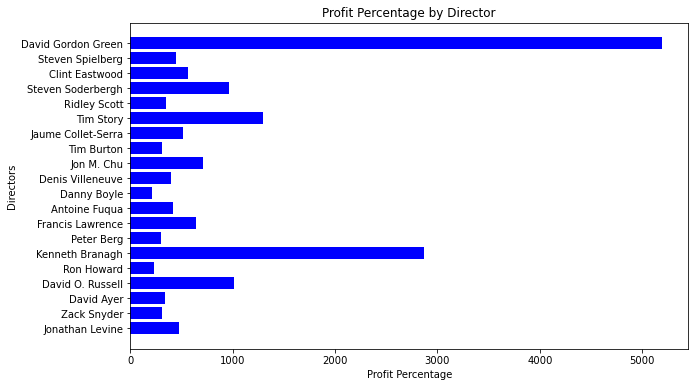

In [267]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(director_sort_by_count_df.index[0:20], director_sort_by_count_df['profit percent'].head(20), color='blue')
ax.invert_yaxis()
ax.set_title("Profit Percentage by Director")
ax.set_xlabel('Profit Percentage')
ax.set_ylabel('Directors')


Text(0, 0.5, 'Directors')

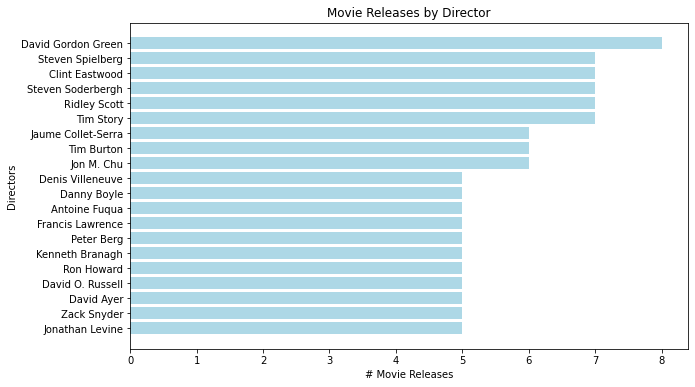

In [268]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(director_sort_by_count_df.index[0:20], director_sort_by_count_df['count'].head(20), color='lightblue')
ax.invert_yaxis()
ax.set_title("Movie Releases by Director")
ax.set_xlabel('# Movie Releases')
ax.set_ylabel('Directors')

Text(0, 0.5, 'Directors')

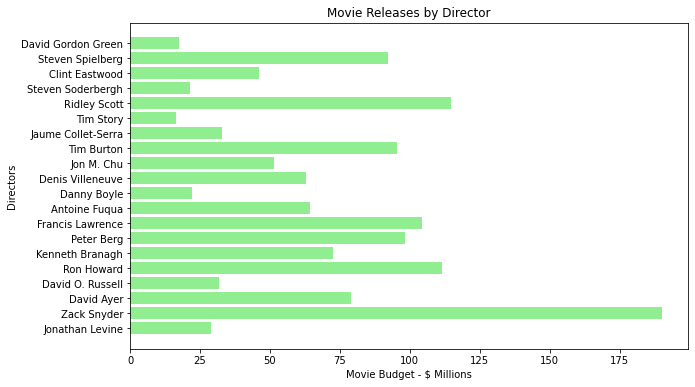

In [269]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(director_sort_by_count_df.index[0:20], director_sort_by_count_df['float_production_budget'].head(20)/1000000, color='lightgreen')
ax.invert_yaxis()
ax.set_title("Movie Releases by Director")
ax.set_xlabel('Movie Budget - $ Millions')
ax.set_ylabel('Directors')


## Sort of Directors by Profitability ##

In [270]:
director_sort_by_profit_df = director_means.sort_values(by=['profit percent'], ascending=False)
director_sort_by_profit_df.head(20)
# ,'count', 'Avg Rating','float_production_budget'

,Avg Rating,Number of Votes,float_production_budget,float_domestic_gross,float_worldwide_gross,profit percent,count
Director,,,,,,,
Travis Cluff,4.200000,17763.000,100000.0,2.276441e+07,4.165647e+07,64420.884000,1
Chris Lofing,4.200000,17763.000,100000.0,2.276441e+07,4.165647e+07,64420.884000,1
Brandon Camp,6.400000,2779.000,500000.0,3.155956e+07,3.155956e+07,12623.824000,1
Levan Gabriadze,5.600000,62043.000,1000000.0,3.278964e+07,6.436420e+07,9715.384300,1
Nate Parker,6.400000,18442.000,5055000.0,1.293078e+07,1.394551e+07,9709.217430,2
Tod Williams,5.700000,93122.000,3000000.0,8.475291e+07,1.775120e+08,8742.164633,1
Jamie Buckner,2.900000,557.000,5000000.0,1.381416e+08,2.789648e+08,8342.127820,1
William Brent Bell,5.100000,51239.500,5500000.0,4.454125e+07,8.499022e+07,8271.324290,2
Bradley Parker,5.000000,60304.000,1000000.0,1.811964e+07,4.241172e+07,6053.136100,1


Text(0, 0.5, 'Directors')

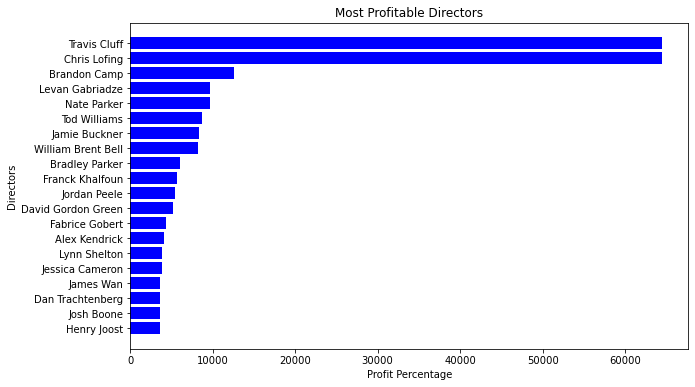

In [271]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(director_sort_by_profit_df.index[0:20], director_sort_by_profit_df['profit percent'].head(20), color='blue')
ax.invert_yaxis()
ax.set_title("Most Profitable Directors")
ax.set_xlabel('Profit Percentage')
ax.set_ylabel('Directors')

Text(0, 0.5, 'Directors')

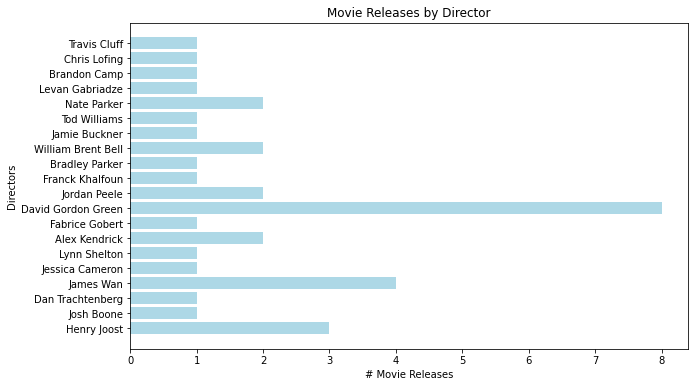

In [273]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(director_sort_by_profit_df.index[0:20], director_sort_by_profit_df['count'].head(20), color='lightblue')
ax.invert_yaxis()
ax.set_title("Movie Releases by Director")
ax.set_xlabel('# Movie Releases')
ax.set_ylabel('Directors')